In [0]:
from numpy import *
# Load the mandrill image
from PIL import Image
from matplotlib.pyplot import *
from keras.datasets import mnist
from keras.utils import np_utils
import keras

I load the data

11493376/11490434 [==============================] - 0s 0us/step


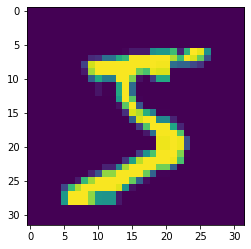

In [2]:
len_test_set=1000
len_train_set=2000

(x_train, label_train), (x_test, label_test) = mnist.load_data()

y_train=np_utils.to_categorical(label_train[:len_train_set],10)
y_test=np_utils.to_categorical(label_test[:len_test_set],10)

im_train=[]
im_test=[]

for im in x_train[:len_train_set]:
  im_train =im_train+[asarray(Image.fromarray(im).resize((32,32)))]
for im in x_test[:len_test_set]:
  im_test =im_test+[asarray(Image.fromarray(im).resize((32,32)))]

imshow(im_train[0])

In [3]:
!pip install dtcwt
import dtcwt

     |████████████████████████████████| 71kB 2.8MB/s 
  Created wheel for dtcwt: filename=dtcwt-0.12.0-cp36-none-any.whl size=87884 sha256=afab4ef0b32e28e0253c032461738714d363a5b2fe3e990b48816bd94fcfbf8b
  Stored in directory: /root/.cache/pip/wheels/af/50/10/5db3067e8d9829dc244808b67d0c0c6b9226756c923e785450
Successfully built dtcwt


Below is the scattering network using DTCWT:

In [0]:
transform = dtcwt.Transform2d()
dtcwt.push_backend('tf')

def scattering_network(scattering_vector,image,m):
  n=len(image)
  J=int(log(n/4)/log(2))
  image_t=transform.forward(image, nlevels=J+1)
  if n>4 and m<M:
    for j in range(J):
      for theta in range(image_t.highpasses[j].shape[2]):
        scattering_vector=scattering_network(scattering_vector,abs(image_t.highpasses[j][:,:,theta]),m+1)
  return([abs(image_t.lowpass)]+scattering_vector)


In [0]:
M=2
scattering_vector_train=[]
scattering_vector_test=[]

for im in im_train:
  scattering_vector_train=scattering_vector_train+[scattering_network([],im,0)]
for im in im_test:
  scattering_vector_test=scattering_vector_test+[scattering_network([],im,0)]

Here I flattened the scattering vector:

In [0]:
train_set=[]
test_set=[]

for S in scattering_vector_train:
  feature_vector_train=[]
  for a in S:
    for b in a:
      for c in b:
        #feature_vector_train=feature_vector_train+[log(c)] # With or without log
        feature_vector_train=feature_vector_train+[c]
  feature_vector_train=np.asarray(feature_vector_train)
  train_set=train_set+[feature_vector_train]

for S in scattering_vector_test:
  feature_vector_test=[]
  for a in S:
    for b in a:
      for c in b:
        #feature_vector_test=feature_vector_test+[log(c)]  # With or without log
        feature_vector_test=feature_vector_test+[c]
  feature_vector_test=np.asarray(feature_vector_test)
  test_set=test_set+[feature_vector_test]

train_set=np.asarray(train_set)
test_set=np.asarray(test_set)

SVM classification

In [0]:
from sklearn.svm import SVC

In [20]:
modelSVM = SVC(kernel="linear", probability=True)
modelSVM.fit(train_set, label_train[:len_train_set])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [21]:
accuracy = modelSVM.score(test_set, label_test[:len_test_set])
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 96.00
